In [26]:
import requests
import json
import xmltodict
import pandas as pd
import datetime

r = requests.get("https://data.channelcoast.org/observations/waves/latest?key=6cefd36d8e12a4dead4cf06d4dbd09c0&sensor=Perranporth&duration=96")
decoded = r.content.decode('utf-8')
response_json = json.loads(json.dumps(xmltodict.parse(decoded)))

hold = response_json['wfs:FeatureCollection']['gml:featureMember']
waves_hs = []
waves_time = []
waves_te = []
for nn in range(0,len(hold),1):
    row_nn = hold[nn]
    hs = float(row_nn['ms:waves']['ms:hs']) #Wave height
    te = float(row_nn['ms:waves']['ms:te']) #Energy period
    time = row_nn['ms:waves']['ms:date']
    waves_hs.append(hs)
    waves_time.append(time)
    waves_te.append(te)


datestamp = pd.to_datetime(waves_time, format='%Y%m%d#%H%M%S')

No handles with labels found to put in legend.


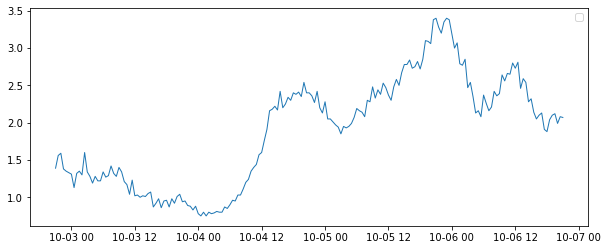

In [27]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt


fig, axs = plt.subplots(sharex=True)
axs.plot(datestamp,waves_hs, linewidth = 1)
axs.legend()
fig.set_size_inches(10,4)

No handles with labels found to put in legend.


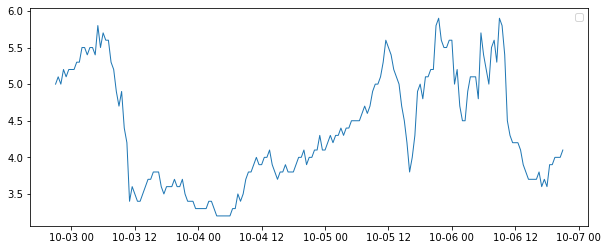

In [25]:
fig, axs = plt.subplots(sharex=True)
axs.plot(datestamp, waves_te, linewidth = 1)
axs.legend()
fig.set_size_inches(10,4)

## Tides

In [58]:


r = requests.get("https://data.channelcoast.org/observations/tides/20210123130000?key=6cefd36d8e12a4dead4cf06d4dbd09c0&sensor=102&duration=24")
decoded = r.content.decode('utf-8')
response_json = json.loads(json.dumps(xmltodict.parse(decoded)))

hold = response_json['wfs:FeatureCollection']['gml:featureMember']
tides_level = []
tides_time = []
for nn in range(0,len(hold),1):
    row_nn = hold[nn]
    level = float(row_nn['ms:tide']['ms:value']) #Wave height
    time = row_nn['ms:tide']['ms:date']
    tides_level.append(level)
    tides_time.append(time)

datestamp = pd.to_datetime(tides_time, format='%Y%m%d#%H%M%S')

No handles with labels found to put in legend.


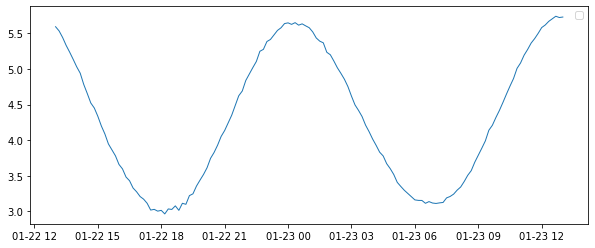

In [59]:

fig, axs = plt.subplots(sharex=True)
axs.plot(datestamp,tides_level, linewidth = 1)
axs.legend()
fig.set_size_inches(10,4)